In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("TCS.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (4628, 5)


,Open,High,Low,Close,Volume
0,38.724998,40.000000,38.724998,39.700001,212976.0
1,39.750000,40.387501,38.875000,39.162498,153576.0
2,39.250000,39.250000,35.724998,36.462502,822776.0
3,36.462502,36.462502,36.462502,36.462502,0.0
4,36.275002,38.000000,35.750000,36.375000,811856.0


In [3]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close'] =  df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Volume
0,38.724998,40.000000,38.724998,39.162498,212976.0
1,39.750000,40.387501,38.875000,36.462502,153576.0
2,39.250000,39.250000,35.724998,36.462502,822776.0
3,36.462502,36.462502,36.462502,36.375000,0.0
4,36.275002,38.000000,35.750000,35.474998,811856.0


In [4]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df.head()

,Open,High,Low,Volume,Close
0,38.724998,40.000000,38.724998,212976.0,39.162498
1,39.750000,40.387501,38.875000,153576.0,36.462502
2,39.250000,39.250000,35.724998,822776.0,36.462502
3,36.462502,36.462502,36.462502,0.0,36.375000
4,36.275002,38.000000,35.750000,811856.0,35.474998


In [5]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

<AxesSubplot:>

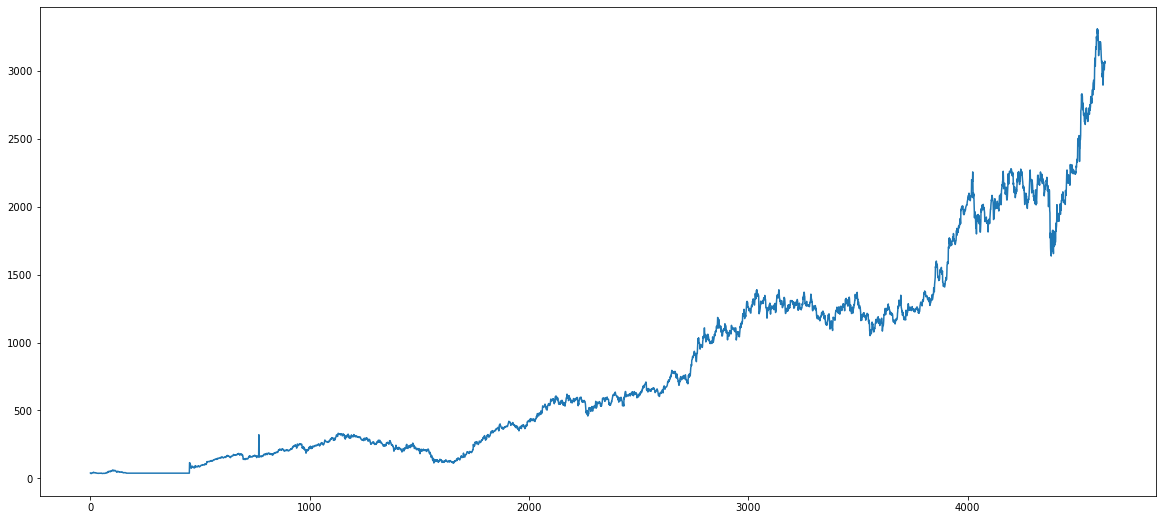

In [6]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [7]:
#columns for x and y
x  = df[['Open','High','Low','Volume']]
y = df['Close']

In [8]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume']] = scaler.fit_transform(df[['Open','High','Low','Volume']])
df.head()

,Open,High,Low,Volume,Close
0,0.000917,0.001075,0.001106,0.002418,39.162498
1,0.001230,0.001192,0.001152,0.001744,36.462502
2,0.001077,0.000848,0.000181,0.009343,36.462502
3,0.000225,0.000004,0.000409,0.000000,36.375000
4,0.000168,0.000469,0.000189,0.009219,35.474998


In [9]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3449, 4)
(1150, 4)
(3449,)
(1150,)


---
# Random Forest

In [10]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [11]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
739,158.457504,184.964700,26.507196
4086,1899.949951,1927.914509,27.964558
1728,190.875000,179.954649,10.920351
2316,552.500000,552.397996,0.102004
79,47.387501,41.829876,5.557625
3928,1741.199951,1724.502233,16.697718
2864,1106.525024,1185.157004,78.631980
3896,1423.849976,1409.282504,14.567472
1833,351.399994,348.034748,3.365246
3806,1352.650024,1360.362272,7.712248


In [12]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9990986506721274
Mean Absolute Error: 12.639728494260702
Mean Squared  Error: 485.2135570956817
Root Mean Squared Error: 22.027563576021787
Loss: 12.639728494260702


---
# k-NN

In [13]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [14]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
739,158.457504,203.112498,44.654994
4086,1899.949951,1395.766683,504.183268
1728,190.875000,877.845815,686.970815
2316,552.500000,1584.883342,1032.383342
79,47.387501,41.787500,5.600001
3928,1741.199951,1835.933350,94.733399
2864,1106.525024,1467.399984,360.874960
3896,1423.849976,881.520848,542.329128
1833,351.399994,397.662506,46.262512
3806,1352.650024,1087.825032,264.824992


In [15]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [16]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.22655548318984875
Mean Absolute Error: 455.74500604115946
Mean Squared  Error: 416359.9545842939
Root Mean Squared Error: 645.2596024735268
Loss: 455.74500604115946


---
# Decision Tree

In [17]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [18]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
739,158.457504,161.987503,3.529999
4086,1899.949951,1880.650024,19.299927
1728,190.875000,175.162506,15.712494
2316,552.500000,566.200012,13.700012
79,47.387501,42.799999,4.587502
3928,1741.199951,1720.599976,20.599975
2864,1106.525024,1214.574951,108.049927
3896,1423.849976,1408.500000,15.349976
1833,351.399994,349.700012,1.699982
3806,1352.650024,1343.425049,9.224975


In [19]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9983711060605361
Mean Absolute Error: 16.53618292493817
Mean Squared  Error: 876.8647161077287
Root Mean Squared Error: 29.611901595603896
Loss: 16.53618292493817


---
# Linear Regression

In [20]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [21]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-4.77669960e-01  7.50641062e-01  7.27712770e-01  2.41428033e-08]
0.07708347939603755


In [22]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
739,158.457504,159.792823,1.335319
4086,1899.949951,1924.898349,24.948398
1728,190.875000,186.258397,4.616603
2316,552.500000,558.392855,5.892855
79,47.387501,42.906352,4.481149
3928,1741.199951,1718.262256,22.937695
2864,1106.525024,1170.988738,64.463714
3896,1423.849976,1400.138816,23.711160
1833,351.399994,344.378679,7.021315
3806,1352.650024,1361.487508,8.837484


In [23]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9993582884678908
Mean Absolute Error: 10.626836450264996
Mean Squared  Error: 345.4455730931325
Root Mean Squared Error: 18.58616617522647
Loss: 10.626836450264996
